# (Ford GoBike System Data)
## by (Hossam El Shabory)

## Preliminary Wrangling

> Data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Reading the csv data file
df = pd.read_csv("https://raw.githubusercontent.com/Gloryzco/Ford-GoBike-Data-Exploration-and-Visualization/master/201902-fordgobike-tripdata.csv")
# Showing the dateset head
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Cleaning The data:

In [5]:
# Checking for null values
null_count = df.isnull().sum()

# Filtering out column was NO null values
no_null_cond = null_count != 0

# Printing out NULL values columns
null_count[no_null_cond].sort_values(ascending = False)

member_birth_year     8265
member_gender         8265
start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
dtype: int64

In [6]:
# Removing ROWS with missing values
df.dropna(axis= 0, inplace = True)

# Checking for Null values removal
if 0 not in df.isnull().sum():
  print("Successfully Removed all ROWS with Null Values.") 
else:
  print("Something went wrong!")

Successfully Removed all ROWS with Null Values.


In [7]:
# Transforming start time column into a date time object and extracting hours / days / months / years from it

# Converting to day time object
df["start_time"] = pd.to_datetime(df["start_time"])

# Extracting hours
df["start_hour"]= df["start_time"].dt.hour

# Extracting days
df["Start_day"] = df["start_time"].dt.strftime("%a")

# Extracting years
df["start_year"]  = df.start_time.dt.year

# Extracting Months
df["start_month"] = df.start_time.dt.month_name()

In [8]:
# Displaying newly created columns
df[["start_hour", "start_year", "start_month"]].head()

,start_hour,start_year,start_month
0,17,2019,February
2,12,2019,February
3,17,2019,February
4,23,2019,February
5,23,2019,February


In [9]:
# Extracting 'duration hours' from the 'duration_sec' columns by dividing the 'duration_sec' column by 120
df["duration_hrs"] = df["duration_sec"] / 120

In [10]:
# Displaying newly created 'duration_hrs' column
df[["duration_hrs", "duration_sec"]].head(2)

,duration_hrs,duration_sec
0,434.875,52185
2,515.450,61854


In [11]:
# Removing the Other gender as it's inconvenient and there are only 2 genders.

# Getting the 'Other' 
other_indexes = df.index[df["member_gender"] == "Other"]

# Droppin the Rows
df.drop(other_indexes, inplace = True)

# Checking the 'member_gender' column value counts 
df["member_gender"].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [12]:
# Calculating the age of members

# Converting the 'member_birth_year' column into numpy int64 to perform a substraction on it's values:
df["member_birth_year"] = df["member_birth_year"].astype(np.int64)

# Calculating the age (subtracting the 2019 from the 'member_birth_year' because the 2019 is the dataset date.)
df["member_age"] = 2019 - df["member_birth_year"]

In [13]:
# Displaying the newly created 'member_age' column
df[["member_age"]].head()

,member_age
0,35
2,47
4,45
5,60
6,36


In [14]:
# Taking alook at the new age column:
df["member_age"].describe()

count    171305.000000
mean         34.160649
std          10.116083
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [15]:
# Max age is 141 which is inconvenient; so will only keep ages below 50: 

# Importing DataFrame from pandas for type hinting
from pandas import DataFrame

def rmv_below(df: DataFrame, value: int, column: str) -> None:
  """This function removes rows in the dataframe with values below the provided one in the column.
  
  Parameters
  ----------
  df : DataFrame
    _description_ : The dataframe containing the dataset.

  value : int
    _description_ : The value to remove any value below it.

  column : str
    _description_ : The column name in the provided dataframe.
  """

  # Extracting the rows with values below the provided one indexes
  rows_indexes = df[ df[column] > value].index

  # Dropping values above the provided value
  df.drop(rows_indexes, inplace = True)
  
# Calling the function on the 'member_age' column with the max values of 50.
rmv_below(df, 50, "member_age")

In [16]:
# Checking:
df["member_age"].describe()

count    156924.000000
mean         32.006322
std           7.173623
min          18.000000
25%          26.000000
50%          31.000000
75%          36.000000
max          50.000000
Name: member_age, dtype: float64

In [17]:
# Choosing the feature(s) we will be exploring:
df_clean = df[
    [
    "bike_id", "user_type", "member_gender", "member_age", 
    "duration_sec", "duration_hrs", "start_time", "start_hour", 
    "Start_day", "start_month", "start_year"
    ]
]

# Show the cleaned dataframe
df_clean.head()

,bike_id,user_type,member_gender,member_age,duration_sec,duration_hrs,start_time,start_hour,Start_day,start_month,start_year
0,4902,Customer,Male,35,52185,434.875000,2019-02-28 17:32:10.145,17,Thu,February,2019
2,5905,Customer,Male,47,61854,515.450000,2019-02-28 12:13:13.218,12,Thu,February,2019
4,4898,Subscriber,Male,45,1585,13.208333,2019-02-28 23:54:18.549,23,Thu,February,2019
6,3803,Subscriber,Female,36,1147,9.558333,2019-02-28 23:55:35.104,23,Thu,February,2019
7,6329,Subscriber,Male,30,1615,13.458333,2019-02-28 23:41:06.766,23,Thu,February,2019


### What is the structure of your dataset?

> 183412 Rows, 16 Columns

### What is/are the main feature(s) of interest in your dataset?

> who uses the services the most, and what other features has to do in relation with the duration and the type / gender of user

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> bike_id	user_type	member_gender	member_age	duration_sec	duration_hrs	start_time	start_hour	
> Start_day	start_month	start_year


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

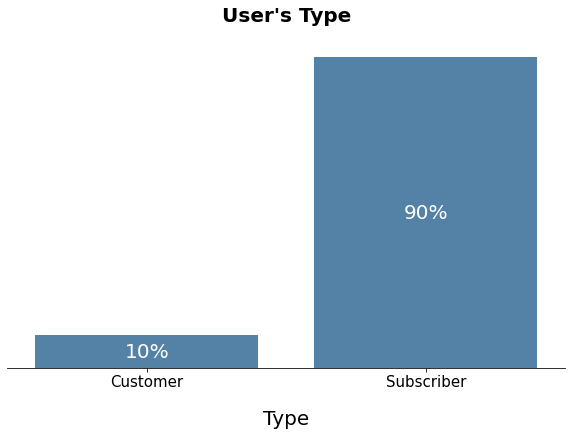

In [19]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize = (10, 6))

# Plotting the count plot
plot = sns.countplot(data = df_clean, x = "user_type", color = "steelblue");

# Adding annotation Percentages
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars
for c in ax.containers:

  # Counting Users for percentage calculation
  user_type_count = df_clean["user_type"].count() 

  # custom label calculates percent and add an empty string so 0 value bars don't have a number
  labels = [f"{h / user_type_count * 100:0.0f}%" if (h := v.get_height()) > 0 else "" for v in c]

  # Setting the on-bar label settings
  ax.bar_label(c, labels = labels, label_type = "center", fontsize = 20, color = "white")

# Setting the plot title
plot.set_title("User's Type", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Type", fontsize = 20, labelpad = 20)
# Removing the y-axis ticks and labels
plot.set_ylabel("")
plot.set_yticks([])
              
# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(left = True);

> About a 90% of the users are subscribed to the service and others are just customers  

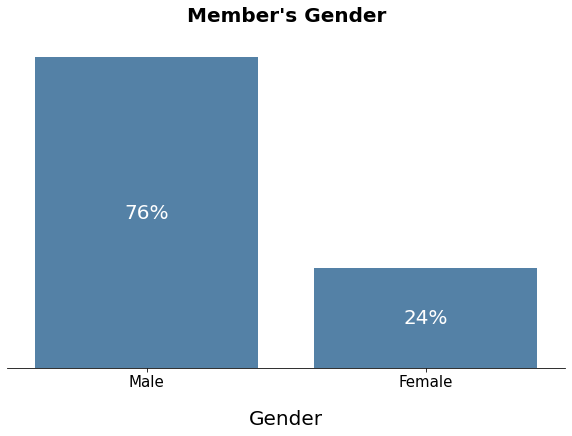

In [20]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize = (10, 6))

# Plotting the count plot
plot = sns.countplot(data = df_clean, x = "member_gender", color = "steelblue");

# Adding annotation Percentages
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars
for c in ax.containers:

  # Counting Users for percentage calculation
  gender_count = df_clean["member_gender"].count() 

  # custom label calculates percent and add an empty string so 0 value bars don't have a number
  labels = [f"{h / gender_count * 100:0.0f}%" if (h := v.get_height()) > 0 else "" for v in c]

  # Setting the on-bar label settings
  ax.bar_label(c, labels = labels, label_type = "center", fontsize = 20, color = "white")


# Setting the plot title
plot.set_title("Member's Gender", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Gender", fontsize = 20, labelpad = 20)
# Removing the y-axis ticks and labels
plot.set_ylabel("")
plot.set_yticks([])

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(left = True);

> Most of users tend to be Males by 76%

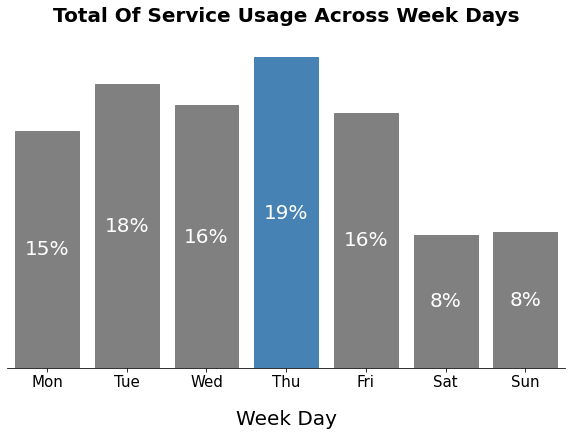

In [21]:
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Setting the figure size for this plot.
fig, ax = plt.subplots(1, figsize = (10, 6))

# Plotting the count plot
plot = sns.countplot(data = df_clean, x = "Start_day", order = weekdays);

# Highlighting the most busy day in the week.
for bar in plot.patches:
  # If the bar height is equal to the max value in the start_day value counts change the color to 'steelblue'.
  if bar.get_height() == max(df_clean["Start_day"].value_counts()):
    # Changing the color of the bar.
    bar.set_color("steelblue")    
  else:
    bar.set_color("grey")

# Adding annotation Percentages.
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars
for c in ax.containers:

  # Counting Users for percentage calculation.
  week_days_count = df_clean["Start_day"].count() 

  # custom label calculates percent and add an empty string so 0 value bars don't have a number.
  labels = [f"{h / week_days_count * 100:0.0f}%" if (h := v.get_height()) > 0 else "" for v in c]

  # Setting the on-bar label settings
  ax.bar_label(c, labels = labels, label_type = "center", fontsize = 20, color = "white")


# Setting the plot title
plot.set_title("Total Of Service Usage Across Week Days", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Week Day", fontsize = 20, labelpad = 20)
# Removing the y-axis ticks and labels
plot.set_ylabel("")
plot.set_yticks([])

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(left = True);

In [22]:
# Calculating the percentage of usage in workdays

# Defining work days in a list for filtering
work_days = ["Mon", "Tue", "Wed", "Thu", "Fri"]

# Calculating the percentage
work_days_usage = round(len(df_clean.query(f"Start_day in {work_days}")) / len(df_clean["Start_day"]) * 100)

# Printing findings
print(f"{work_days_usage}% of services usage are done in workdays.")

83% of services usage are done in workdays.


> Most of the bikes usage are in the work days ~(83%), with high usage on Tuesday; assuming it's used to commute to work  

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [23]:
df["duration_hrs"].describe()

count    156924.000000
mean          5.789681
std          13.297191
min           0.508333
25%           2.683333
50%           4.233333
75%           6.525000
max         704.566667
Name: duration_hrs, dtype: float64

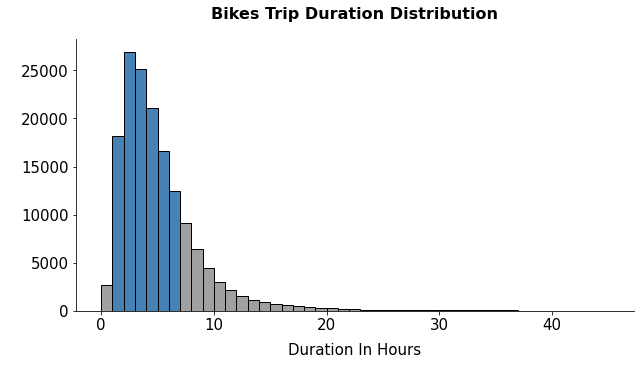

In [24]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize=(10, 5))

# Setting up the bins fro the histogram
bins = np.arange(0, df_clean["duration_hrs"].mean() + 40, 1)

# Ploting a histogram showing the 'duration_hrs' distribution 
plot = sns.histplot(df_clean["duration_hrs"], bins = bins, color = "gray");

# Setting the plot title
plot.set_title("Bikes Trip Duration Distribution", fontsize= 16, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Duration In Hours", fontsize = 15, labelpad = 10)
# Removing the y-label for readability
plot.set_ylabel(" ")

# Highlighting the the frequent respondent age range 
for n in range(1, 7):
  plot.patches[n].set_facecolor("steelblue")

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine
sns.despine(top = True)

> Most of the trips duration are 5 to 10 hours long.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Around 90% of users are subscribers.

- Around of 75% of users are males.

- Around 83% of trips are done on the weekdays and in the weekends.

- Thursday has the most trips done.

- Trip hourly duration distribution is skewed to the right with most of the trips are within the range of 5 to 10 hours long.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Changed the start time variable to a date time object to extract dates from it using dt() method and create the start day / hour / month / year, also remove the gender type others to limit the investigation to Females/Males only and used member_birth_year to calculate the members age 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

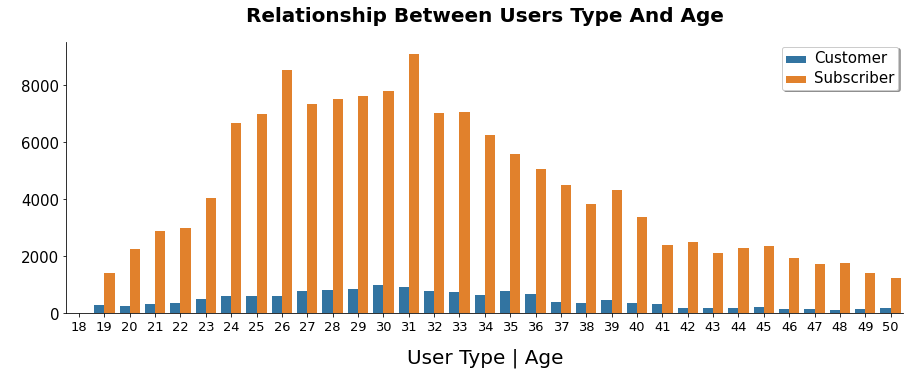

In [25]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize=(15, 5))

# Plotting 
plot = sns.countplot(data = df_clean, x = "member_age", hue = "user_type");

# Setting up the legend
plt.legend(loc="upper right", fancybox = True, shadow = True)
# Increasing legend text and title size
plt.setp(ax.get_legend().get_texts(), fontsize = "15") 
plt.setp(ax.get_legend().get_title(), fontsize = "15") 

# Setting the plot title
plot.set_title("Relationship Between Users Type And Age", fontsize= 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("User Type | Age", fontsize = 20, labelpad = 15)
# Removing the y-label for readability
plot.set_ylabel(" ")

# Increasing the x-ticks font size
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)

# Removing plot spine
sns.despine(top = True)

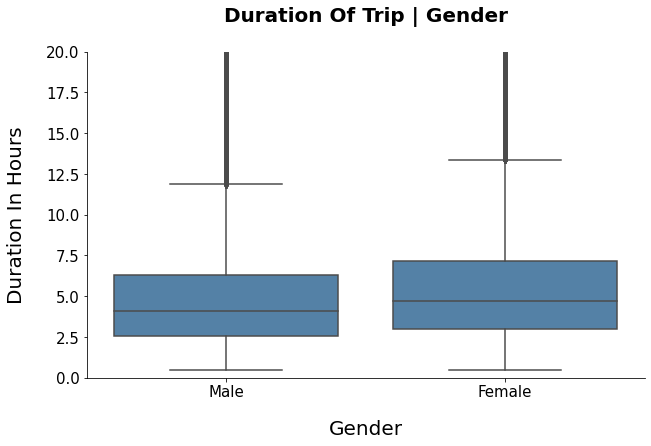

In [26]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize = (10, 6))

# Plotting the count plot
plot = sns.boxplot(data = df_clean, x= "member_gender", y= "duration_hrs", color = "steelblue");
plt.ylim(0, 20)

# Setting the plot title
plot.set_title("Duration Of Trip | Gender", fontsize = 20, fontweight = "bold", pad = 30)

# Setting the x-label
plot.set_xlabel("Gender", fontsize = 20, labelpad = 20)
# Setting the Y-label
plot.set_ylabel("Duration In Hours", fontsize = 20, labelpad = 20)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine()

> Females users seem to have a slightly longer trips

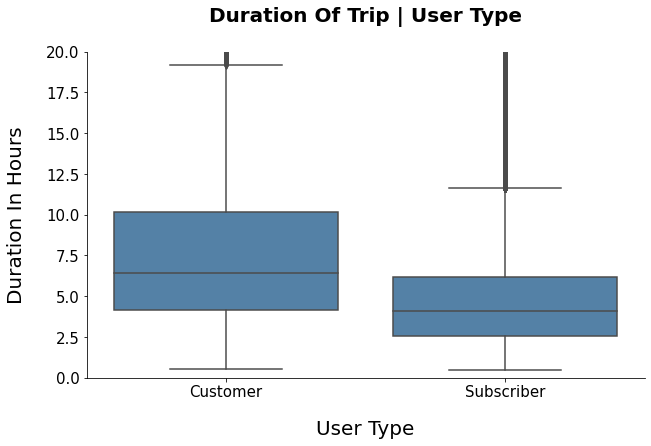

In [27]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize = (10, 6))

# Plotting the count plot
plot = sns.boxplot(data = df_clean, x = "user_type", y = "duration_hrs", color = "steelblue");
plt.ylim(0, 20)

# Setting the plot title
plot.set_title("Duration Of Trip | User Type", fontsize = 20, fontweight = "bold", pad = 30)

# Setting the x-label
plot.set_xlabel("User Type", fontsize = 20, labelpad = 20)
# Setting the Y-label
plot.set_ylabel("Duration In Hours", fontsize = 20, labelpad = 20)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine()

> Customers seems to have longer trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 
- Trip count and duration decreases as the member age goes update

- Most of customers and subscribers that are taking the trips are within the ages of 27 to 37.

- Females trips duration are slightly longer that males

- Customers over all take longer trips than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> most of users are males but females take the longer trips but also
> customers take longer trips over all than subscribers so i'm asumming
> most of most of customers are females.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

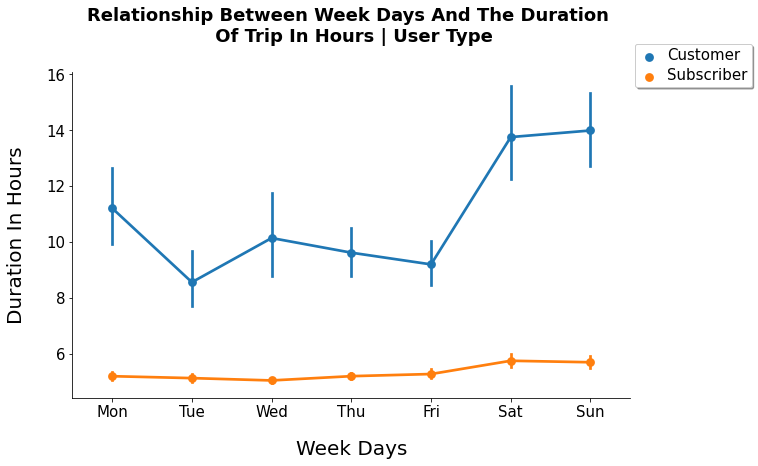

In [28]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize = (10, 6))

# A list of week days order
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Plotting the pointplot
plot = sns.pointplot(data = df_clean, x = "Start_day", y= "duration_hrs", hue = "user_type", order = weekdays);

# Setting up the legend
plt.legend(bbox_to_anchor=(1, 1.1), loc="upper left", fancybox = True, shadow = True)
# Increasing legend text and title size
plt.setp(ax.get_legend().get_texts(), fontsize = "15") 
plt.setp(ax.get_legend().get_title(), fontsize = "15") 

# Setting the plot title
plot.set_title("Relationship Between Week Days And The Duration \n Of Trip In Hours | User Type", fontsize = 18, fontweight = "bold", pad = 30)

# Setting the x-label
plot.set_xlabel("Week Days", fontsize = 20, labelpad = 20)
# Setting the Y-label
plot.set_ylabel("Duration In Hours", fontsize = 20, labelpad = 20)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine()

> Customers seem to take more trips on weekends than subscribers, subscribers seems to have asteady trip dutaion across the week with a little dip in the duration on weekends

In [29]:
df_clean["Start_day"] = pd.Categorical(
  df_clean["Start_day"], 
  categories= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], 
  ordered = True
)

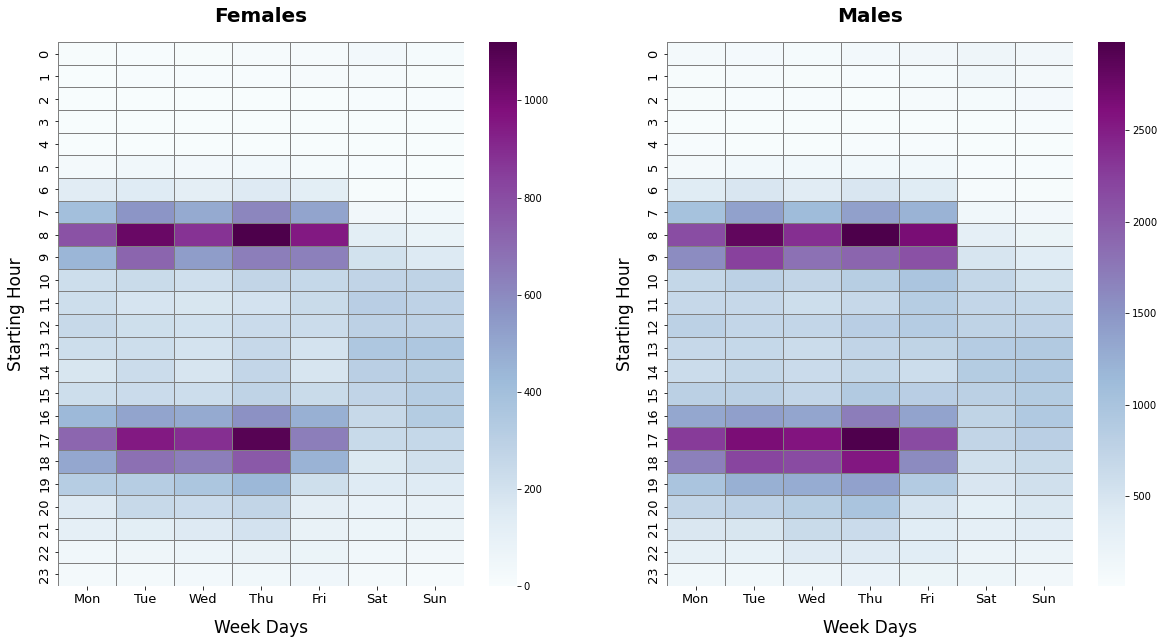

In [36]:
# ----------- SETTING UP DATA ----------- #

# ------ MALES DATA ------ #
males = df_clean.query("member_gender == 'Male'")
males = males.groupby(["start_hour", "Start_day"])["bike_id"].size().reset_index()
males = males.pivot("start_hour", "Start_day", "bike_id")


# ------ FEMALES DATA ------ #
females = df_clean.query("member_gender == 'Female'")
females = females.groupby(["start_hour", "Start_day"])["bike_id"].size().reset_index()
females = females.pivot("start_hour", "Start_day", "bike_id")


# ----------- PLOTTING HEATMAPS ----------- #

# Setting up figure size
plt.figure(figsize= (20, 10))

# ---- MALES HEATMAP ---- #

# Setting the figure size for this plot
plt.subplot(1, 2, 2)

# Plotting the males heatmap
plot_1 = sns.heatmap(
    males, 
    cmap = "BuPu", 
    linewidth = 1,
    linecolor = "gray",
);

# Adding the figure Title and setting the font settings
plot_1.set_title("Males", fontsize = 20, fontweight = "bold", pad=20)

# Setting the x and y labels
plot_1.set_xlabel("Week Days", fontsize = 17, labelpad = 13)
plot_1.set_ylabel("Starting Hour", fontsize = 17, labelpad = 13);

# Increasing the x-ticks font size
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

# ---- FEMALES HEATMAP ---- #

# Setting the figure size for this plot
plt.subplot(1, 2, 1) 

# Plotting the females heatmap
plot_2 = sns.heatmap(
    females, 
    cmap = "BuPu", 
    linewidth = 1,
    linecolor = "gray",
);

# Adding the figure Title and setting the font settings
plot_2.set_title("Females", fontsize = 20, fontweight = "bold", pad=20)

# Setting the x and y labels
plot_2.set_xlabel("Week Days", fontsize = 17, labelpad = 13)
plot_2.set_ylabel("Starting Hour", fontsize = 17, labelpad = 13)

# Increasing the x-ticks font size
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13);

> Most trips done by females userss are on tuesdays and wednesdays and also fridays around 9 to 7 am and 6 to 8 pm Same thing seems to be true for males users

 ### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Workdays and trips duration , also trip time users seems to make trips around 7 to 9 am and also around 6 to 8 pm, which strengthes the assumption that users are using the service to commute to and from work

### Were there any interesting or surprising interactions between features?

> No, not really